Fall 2024
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

DSAI 308, Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center"></h3>
<h1 align="center">Lab 4</h3>
<h1 align="center">Pretrained CNN Architecture Models</h3>

---

#Image augmantaion

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

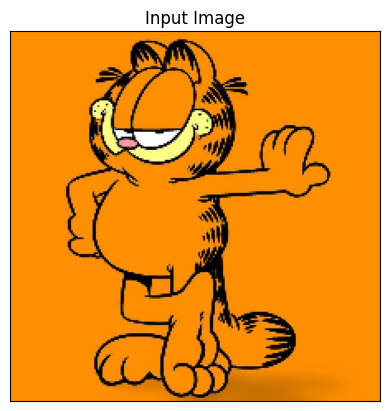

In [ ]:
img = cv2.imread('/content/garfield.png')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(RGB_img, (224, 224))

##Random Rotations
we can genaerate images from our data having varying and different artificially and randomly rotating  in the scene.

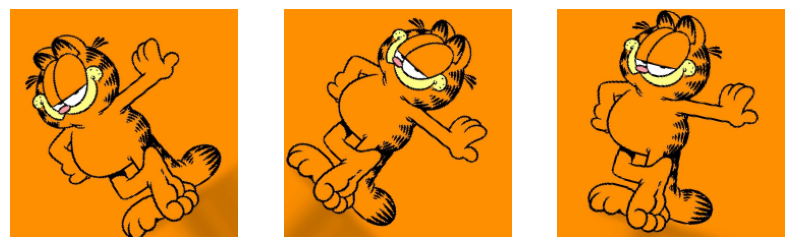

In [ ]:
# example of horizontal shift image augmentation
data = img_to_array(img)
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range = 120)

it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
# generate batch of images
for i in range(3):
	# convert to unsigned integers
	batch = next(it)
	image = batch[0].astype('uint8')
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')


##Random Shifts
Objects in your images might not always appear centered within the frame; they can be positioned off-center in various ways.

To train your deep learning network to recognize and manage off-center objects, you can augment your training data by creating shifted versions of it. Keras allows you to apply random horizontal and vertical shifts to the training data using the width_shift_range and height_shift_range parameters.

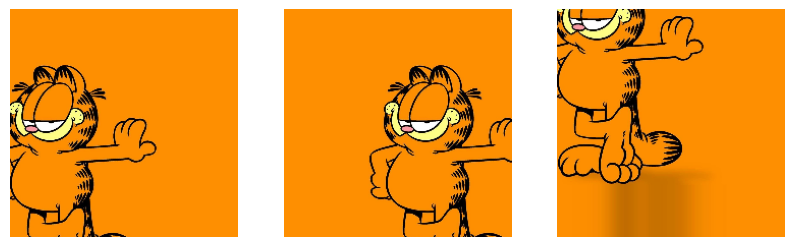

In [ ]:
# example of horizontal shift image augmentation
data = img_to_array(img)
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-50, 50],height_shift_range=[-50, 50])

it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
# generate batch of images
for i in range(3):
	# convert to unsigned integers
	batch = next(it)
	image = batch[0].astype('uint8')
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

##Random Flips
Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data.

Keras supports random flipping along both the vertical and horizontal axes using the vertical_flip and horizontal_flip arguments.

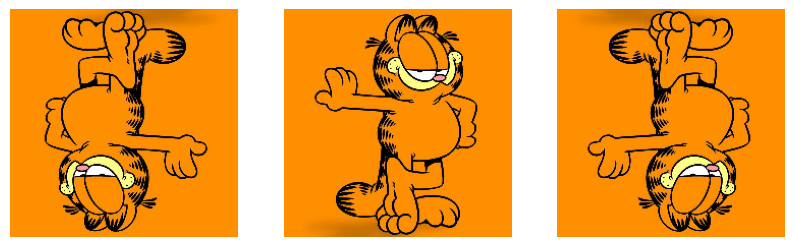

In [ ]:
# example of horizontal shift image augmentation
data = img_to_array(img)
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)

it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
# generate batch of images
for i in range(3):
	# convert to unsigned integers
	batch = next(it)
	image = batch[0].astype('uint8')
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

##Random Brightness
Another augmentation to your image data that can improve performance on large and complex problems is to create random brightness of images in your training data.

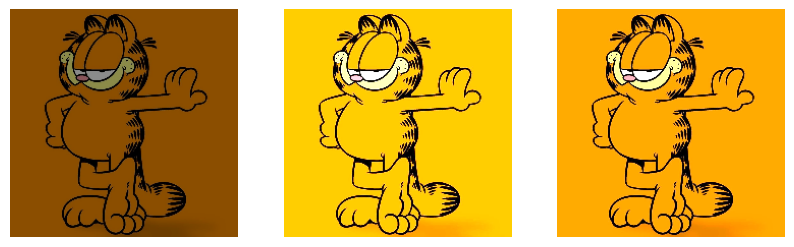

In [ ]:
# example of horizontal shift image augmentation
data = img_to_array(img)
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.5, 1.5])

it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
# generate batch of images
for i in range(3):
	# convert to unsigned integers
	batch = next(it)
	image = batch[0].astype('uint8')
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

##Random Zoom
Another augmentation to your image data that can improve performance on large and complex problems is to create random zoom of images in your training data.

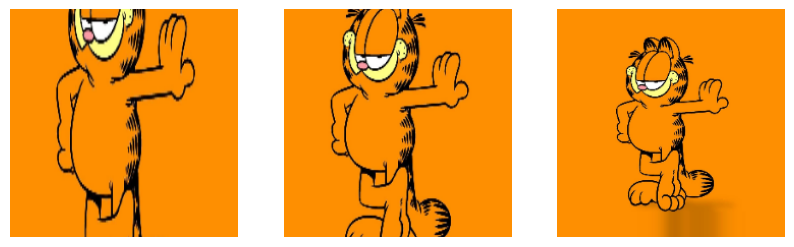

In [ ]:
# example of horizontal shift image augmentation
data = img_to_array(img)
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5, 1.5])

it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
# generate batch of images
for i in range(3):
	# convert to unsigned integers
	batch = next(it)
	image = batch[0].astype('uint8')
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

#VGG_16 Architecture:
Pretrained VGG_16 model Using Keras and Dataset Brain_Tumor_Dataset

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

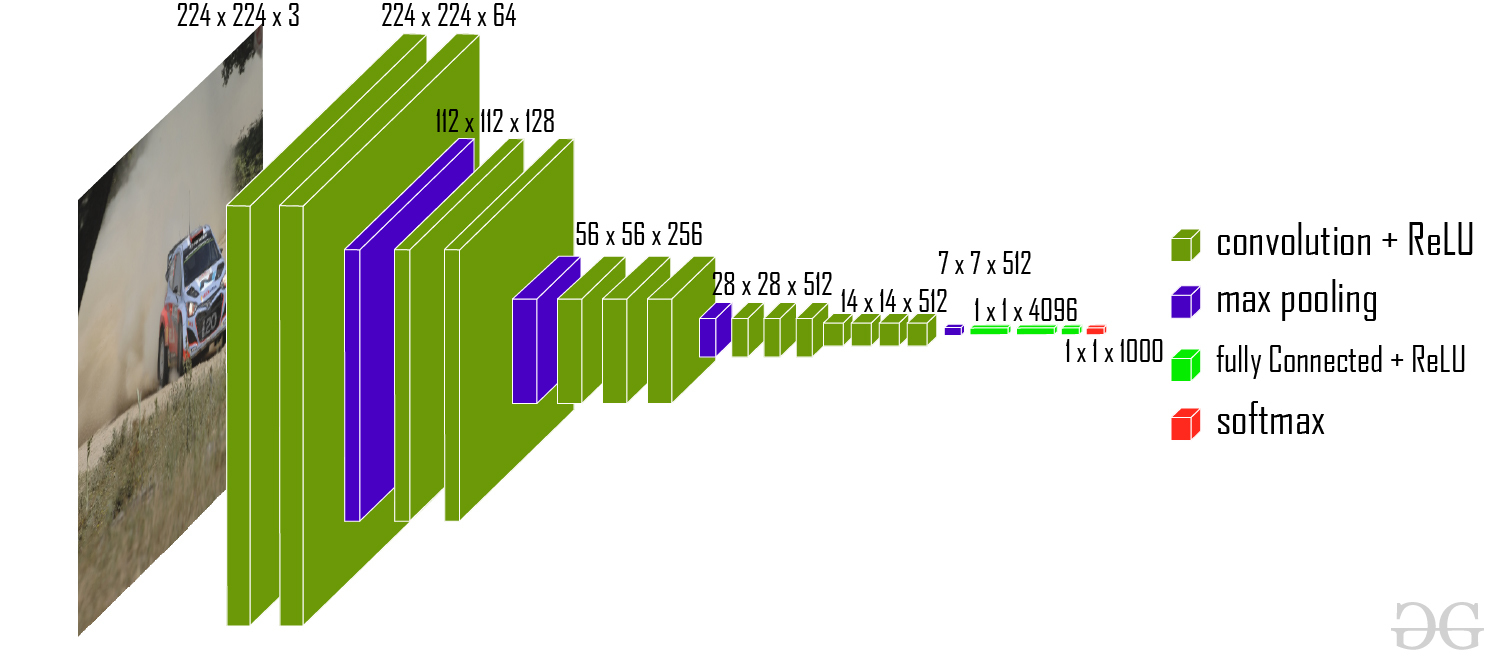

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import  Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import numpy as np
import shutil

##Download, Unzip and split the Brain_Tumor_dataset into train_data and valid_data

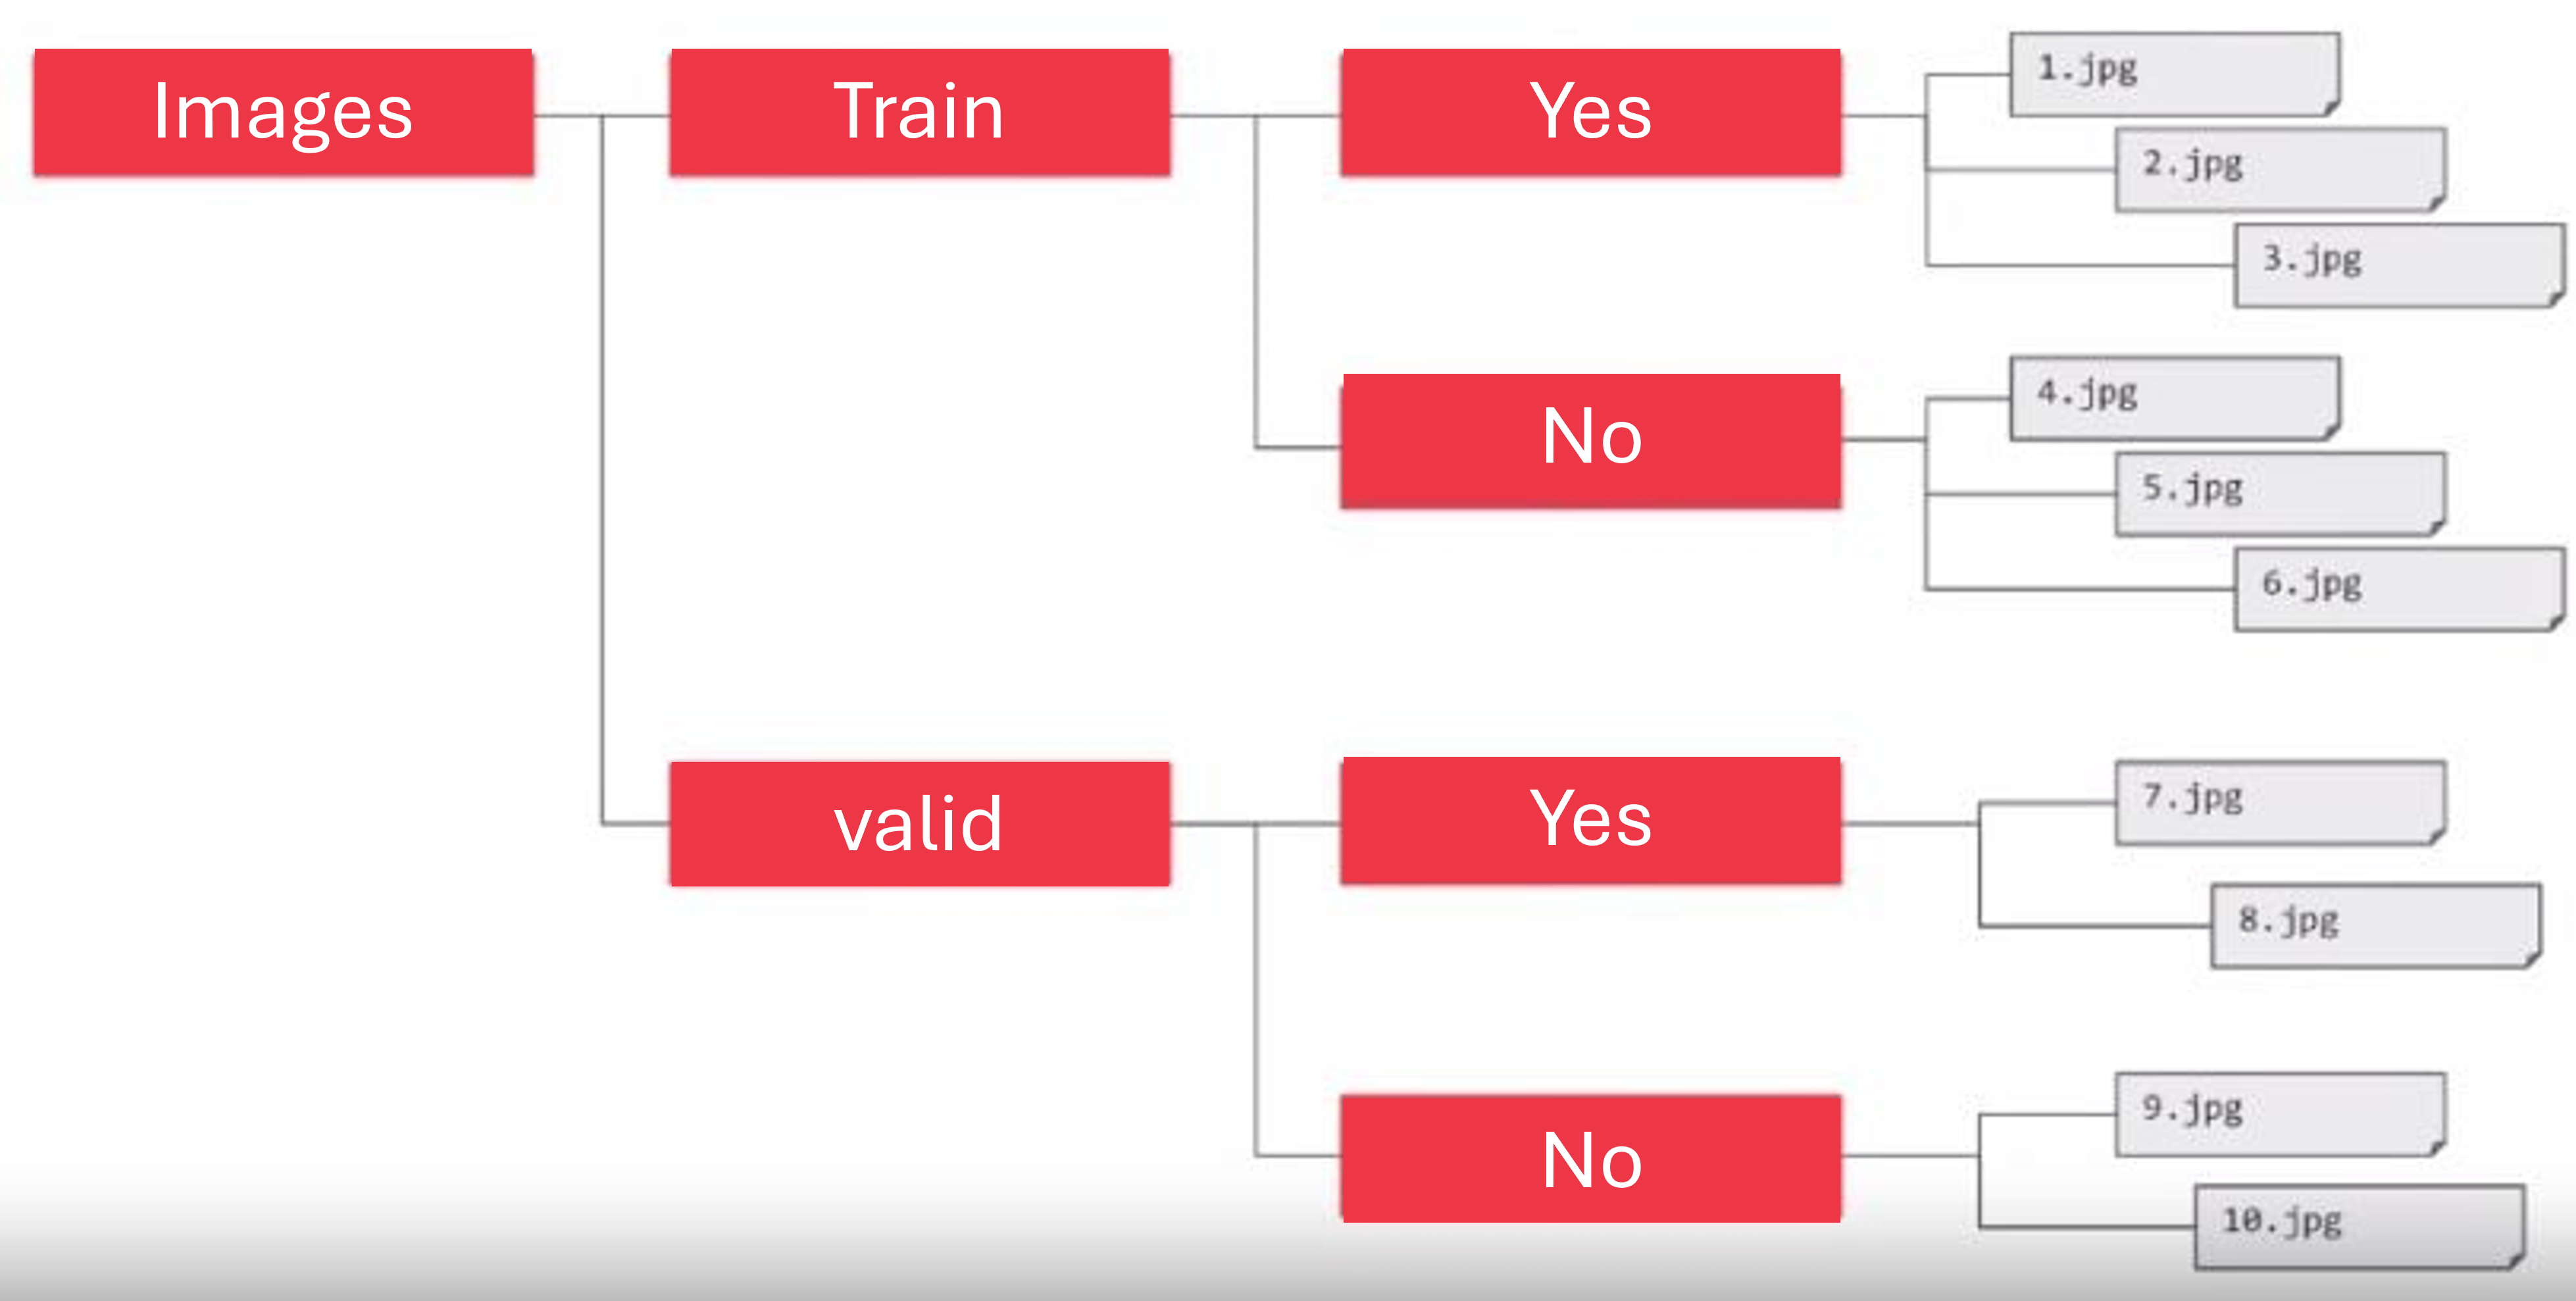

In [ ]:
#First Unzip the Dataset File
import zipfile
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
path = '/content/brain_tumor_dataset'
# Assuming the data is in 'Training' and 'Testing' folders
# Update this if your dataset has a different structurea
train_path = os.path.join(path, 'Training')
test_path = os.path.join(path, 'Testing')

rootdir = '/content/'
classes_dir = ['yes', 'no']  # total labels

for i in classes_dir:
    if not os.path.exists(rootdir +'/train/' + i):
        os.makedirs(rootdir +'/train/' + i)
    if not os.path.exists(rootdir +'/test/' + i):
        os.makedirs(rootdir +'/test/' + i)

    source = path + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.30

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
      shutil.copy(name, rootdir +'/test/' + i)

In [ ]:
#Setting dataset path for train and test sets
train_path = rootdir + 'train'
test_path = rootdir + 'test'

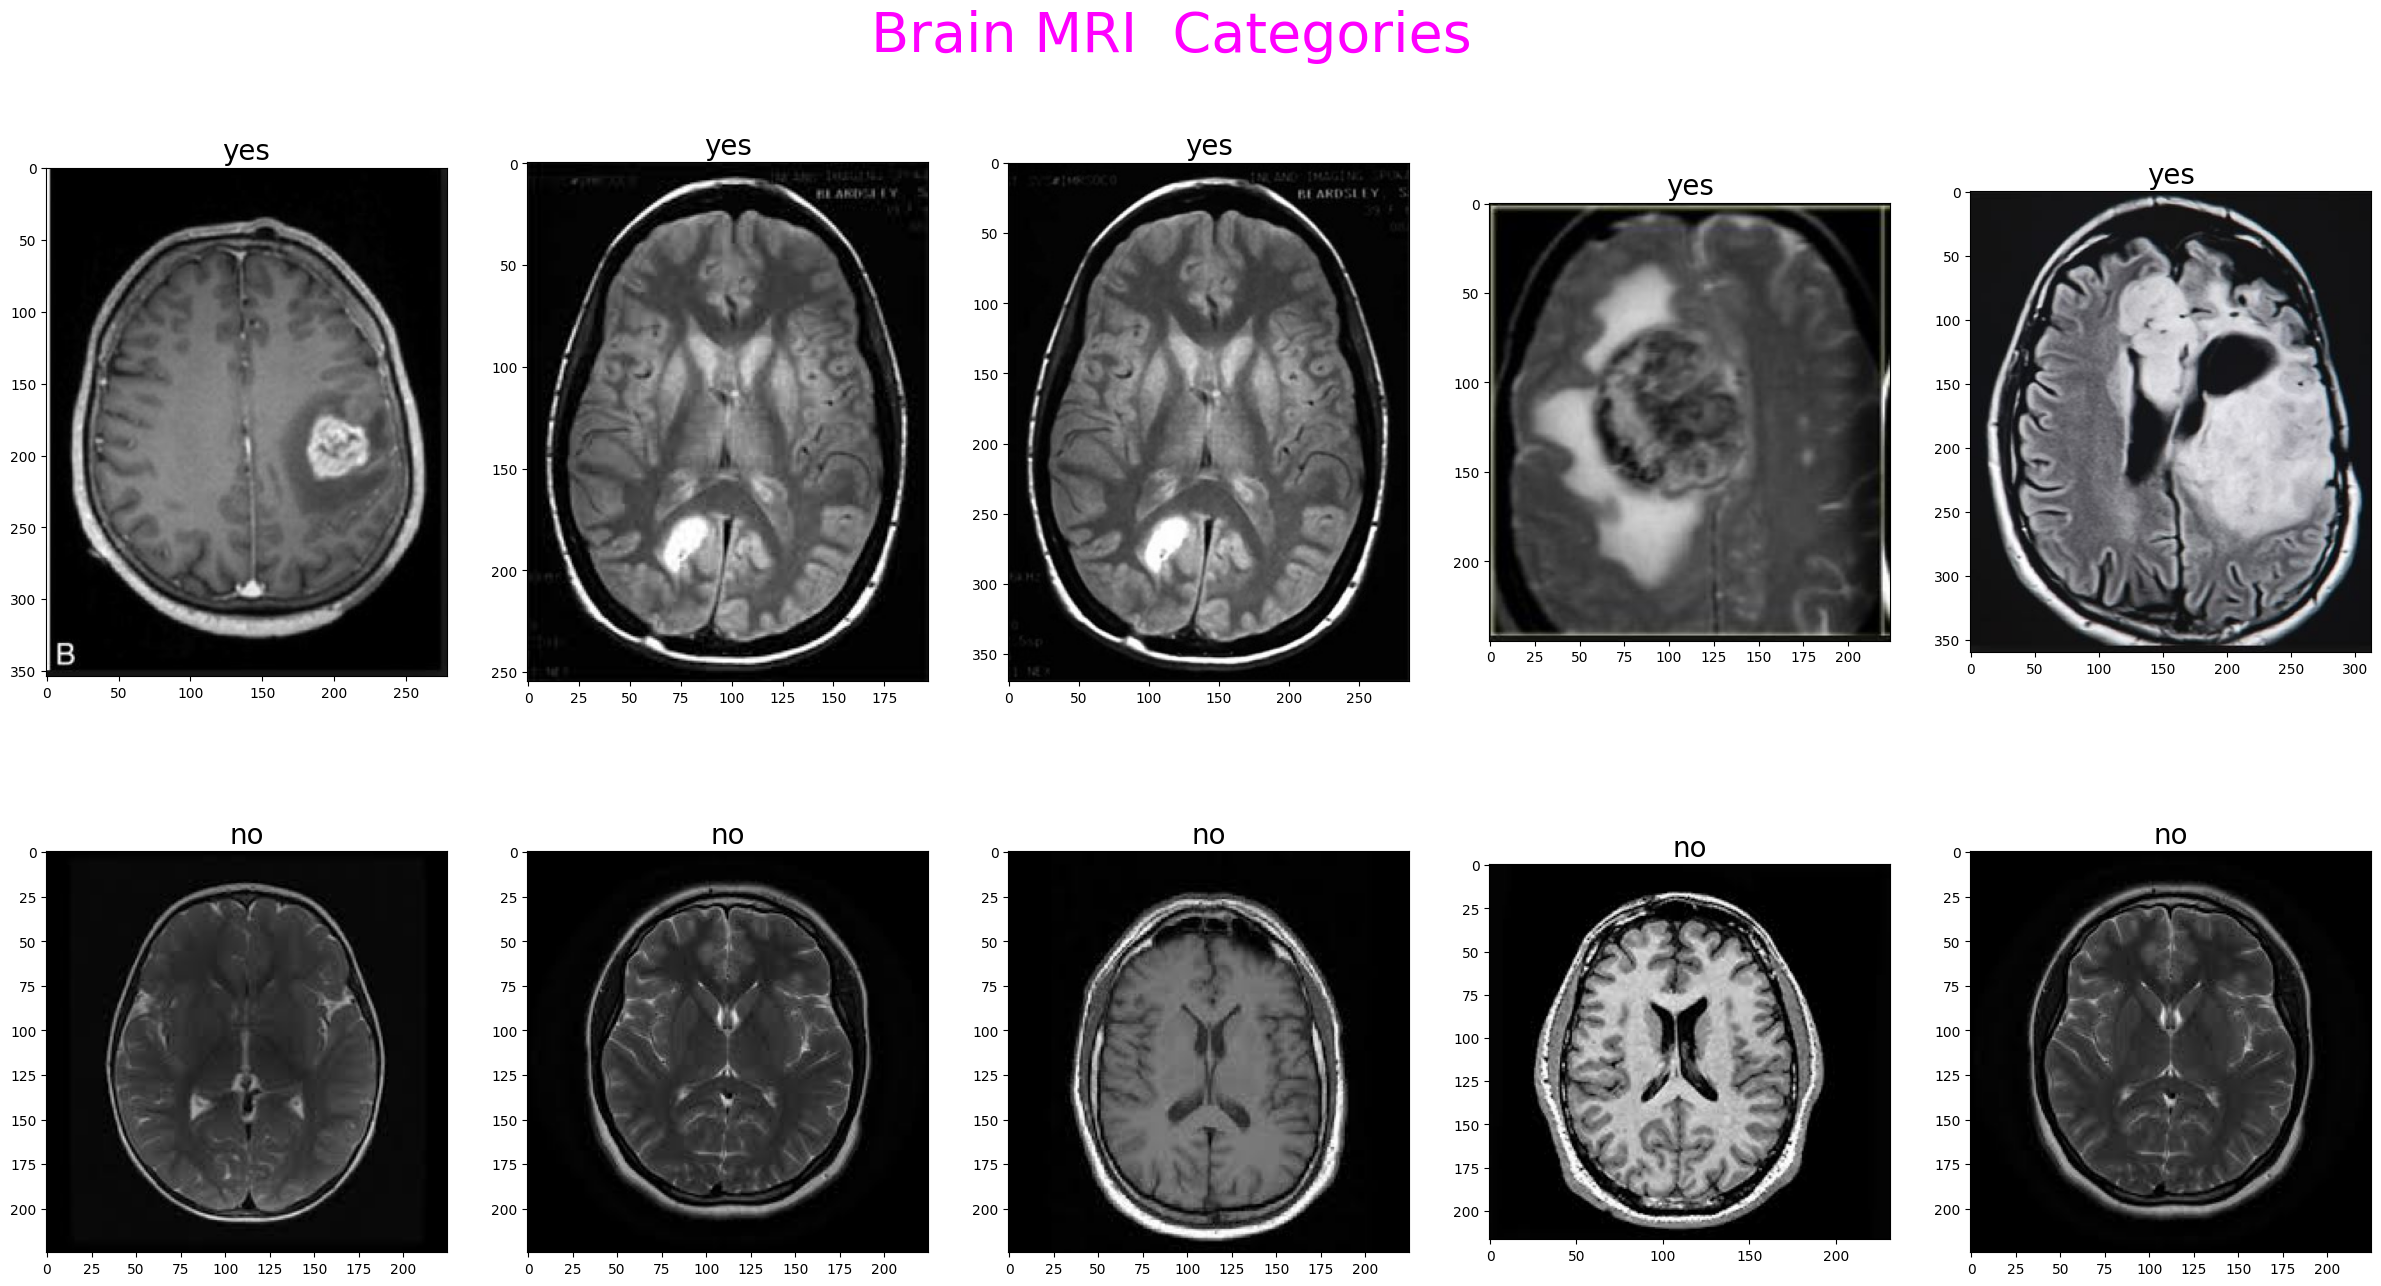

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(30,15))
fig.suptitle('Brain MRI  Categories',color='magenta',fontsize=40)
for i in range(2):
    for j in range(5):
        im_src = rootdir +'train/' + classes_dir[i] + '/'
        FileNames = os.listdir(im_src)
        np.random.shuffle(FileNames)
        im_src = str(im_src + FileNames[j])
        imag = img.imread(im_src)
        ax[i, j].imshow(imag)
        ax[i, j].set_title(classes_dir[i], fontsize=20)

##Apply Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip= True,
    fill_mode='nearest')

# test Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip= True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'binary')
no_of_validation_images = len(test_set)
validation_steps = np.ceil(no_of_validation_images)

Found 176 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


##Generate VGG16 model

In [ ]:
IMAGE_SIZE = [224, 224, 3]
base_model = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))

In [ ]:
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/vgg16_weights_tf_dim_ordering_tf_kernels.keras',
                               verbose=2, save_best_only=True)
callbacks = [checkpoint]
start = datetime.now()

model_history=model.fit(
                      train_set,
                      validation_data=test_set,
                      epochs=150,
                      callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.04713, saving model to /content/vgg16_weights_tf_dim_ordering_tf_kernels.keras
6/6 - 30s - 5s/step - accuracy: 0.6023 - loss: 1.2380 - val_accuracy: 0.6234 - val_loss: 1.0471
Epoch 2/150

Epoch 2: val_loss improved from 1.04713 to 1.00287, saving model to /content/vgg16_weights_tf_dim_ordering_tf_kernels.keras
6/6 - 5s - 821ms/step - accuracy: 0.5511 - loss: 1.2344 - val_accuracy: 0.5844 - val_loss: 1.0029
Epoch 3/150

Epoch 3: val_loss improved from 1.00287 to 0.85599, saving model to /content/vgg16_weights_tf_dim_ordering_tf_kernels.keras
6/6 - 4s - 660ms/step - accuracy: 0.6364 - loss: 1.0570 - val_accuracy: 0.6623 - val_loss: 0.8560
Epoch 4/150

Epoch 4: val_loss did not improve from 0.85599
6/6 - 6s - 1s/step - accuracy: 0.6420 - loss: 0.9344 - val_accuracy: 0.7013 - val_loss: 0.9142
Epoch 5/150

Epoch 5: val_loss improved from 0.85599 to 0.81225, saving model to /content/vgg16_weights_tf_dim_ordering_tf_kernels.keras
6/6 - 4s - 654ms/step

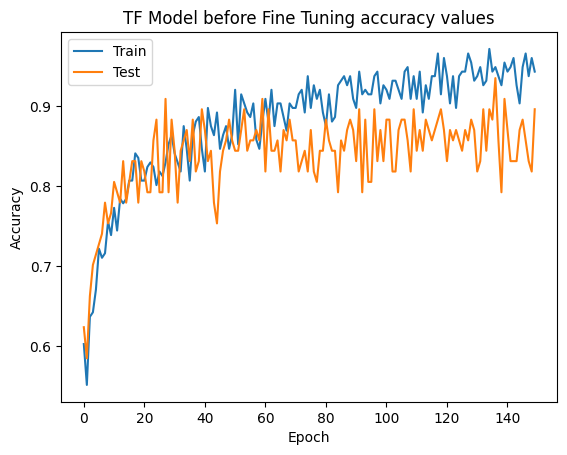

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('TF Model before Fine Tuning accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

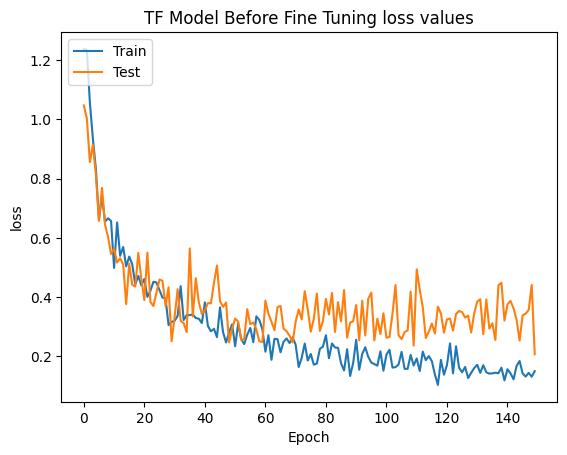

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('TF Model Before Fine Tuning loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#AlexNet Architecture:
Pretrained AlexNet model Using Pytorch and Dataset CIFAR-10

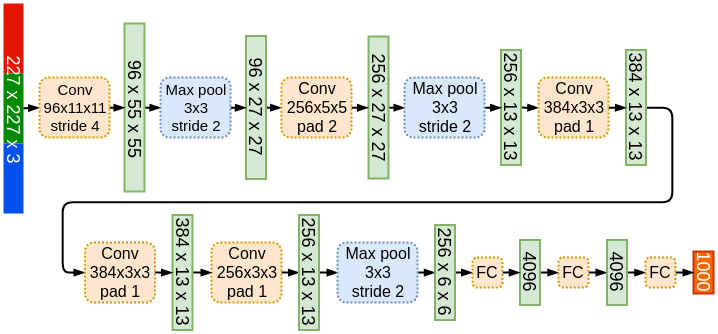

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from torchvision.models import alexnet

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  ##Prevent errors from being reported if the image is too small and the network is too deep
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 34614522.79it/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


In [ ]:
Alexnet_model = alexnet(pretrained=True).to('cuda')
print('alexnet:')
print(Alexnet_model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


alexnet:
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bia

In [ ]:
#Custom classification header
## Redefine the output layer of the classification header
Alexnet_model.classifier._modules['6'] = nn.Linear(4096, 10).to('cuda')
print(Alexnet_model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.optim as optim
Loss = nn.CrossEntropyLoss().to('cuda')
optimizer = optim.SGD(Alexnet_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
def model_fit(epoch, model, trainloader):

    for x_train, y_train in trainloader:
        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        y_pred = model(x_train).to('cuda')
        loss = Loss(y_pred, y_train).to('cuda')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct = 0
        samples_num = 0
        epoch_loss_sum = 0

        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y_train).sum().item()
            samples_num += y_train.size(0)
            epoch_loss_sum += loss.item()

    epoch_loss = epoch_loss_sum / len(trainloader.dataset)
    epoch_acc = correct / samples_num

    print('epoch: ', epoch,
          'train loss： ', round(epoch_loss, 3),
          'train accuracy:', round(epoch_acc, 3),
          )

    return epoch_loss, epoch_acc

In [ ]:
epochs = 6
train_loss = []
train_acc = []

for epoch in range(1, epochs + 1):
    epoch_loss, epoch_acc = model_fit(epoch,
                                      Alexnet_model.to('cuda'),
                                      trainloader)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

epoch:  7 train loss：  0.004 train accuracy: 0.85
epoch:  7 train loss：  0.003 train accuracy: 0.91
epoch:  7 train loss：  0.005 train accuracy: 0.87
epoch:  7 train loss：  0.002 train accuracy: 0.92
epoch:  7 train loss：  0.003 train accuracy: 0.88
epoch:  7 train loss：  0.001 train accuracy: 0.97
epoch:  7 train loss：  0.002 train accuracy: 0.9


In [ ]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to('cuda'), data[1].to('cuda')
        outputs = Alexnet_model(images).to('cuda')
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 87.95 %


#Task

1. Use the VGG-19 model to do multicalss calssification task on the fetch_olivetti_faces dataset, after applying some image augmantation techniques on the dataset to increase its small size to be sufficient for the model training.

## Import the dataset

In [ ]:
from sklearn.datasets import fetch_olivetti_faces  #size 400 images
data = fetch_olivetti_faces()
images = data.images
targets = data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


##Show some samples of it

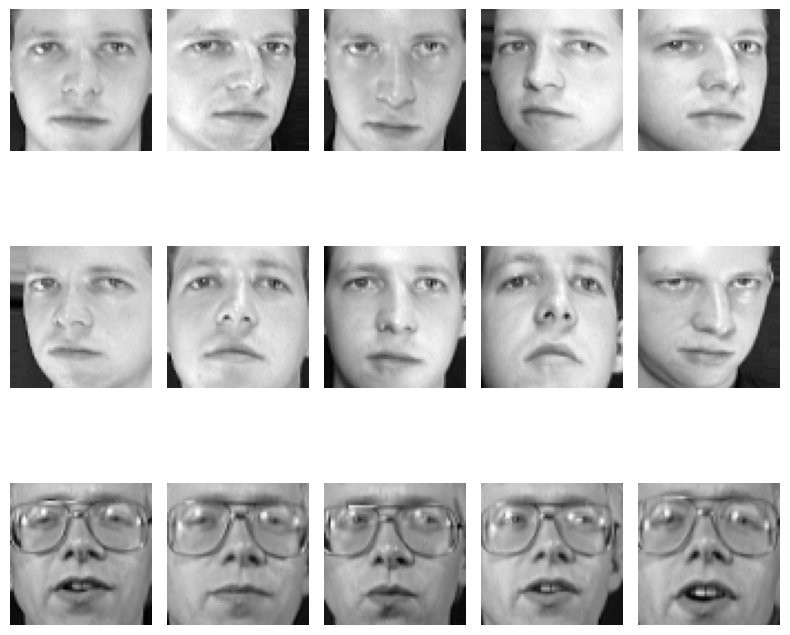

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 15

# Create a figure and axes
fig, axes = plt.subplots(3, 5, figsize=(8, 8))  # 3 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Display the images
for i in range(num_images):
    axes[i].imshow(images[i], cmap='gray')  # Display image in grayscale
    axes[i].axis('off')  # Turn off axis ticks and labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Show the plot

# **Resources**

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

https://www.analyticsvidhya.com/blog/2021/03/image-augmentation-techniques-for-training-deep-learning-models/

https://keras.io/api/applications/

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
